In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('../raw_data/amazon_products.csv')
data.head()

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth
0,B014TMV5YE,"Sion Softside Expandable Roller Luggage, Black...",https://m.media-amazon.com/images/I/815dLQKYIY...,https://www.amazon.com/dp/B014TMV5YE,4.5,0,139.99,0.00,104,False,2000
1,B07GDLCQXV,Luggage Sets Expandable PC+ABS Durable Suitcas...,https://m.media-amazon.com/images/I/81bQlm7vf6...,https://www.amazon.com/dp/B07GDLCQXV,4.5,0,169.99,209.99,104,False,1000
2,B07XSCCZYG,Platinum Elite Softside Expandable Checked Lug...,https://m.media-amazon.com/images/I/71EA35zvJB...,https://www.amazon.com/dp/B07XSCCZYG,4.6,0,365.49,429.99,104,False,300
3,B08MVFKGJM,Freeform Hardside Expandable with Double Spinn...,https://m.media-amazon.com/images/I/91k6NYLQyI...,https://www.amazon.com/dp/B08MVFKGJM,4.6,0,291.59,354.37,104,False,400
4,B01DJLKZBA,Winfield 2 Hardside Expandable Luggage with Sp...,https://m.media-amazon.com/images/I/61NJoaZcP9...,https://www.amazon.com/dp/B01DJLKZBA,4.5,0,174.99,309.99,104,False,400


In [2]:
# Remove the unnecessary columns, only keep the 'title', 'stars', 'price', 'listPrice', 'category_id', 'boughtInLastMonth' for future analysis
data = data[['title', 'stars', 'price', 'listPrice', 'category_id', 'boughtInLastMonth', 'isBestSeller']]

In [3]:
# To analysis the association between product rating and its discount, we create a new variable named discount
# Discount = price/listPrice
# As the listPrice is only existing when there is discount, so we set the discount as 1 when listPrice not existing 
# data['Discount'] = data.apply(lambda row: 1 if row['listPrice'] == 0 else row['price'] / row['listPrice'], axis=1)
data.loc[data['listPrice'] == 0, 'listPrice'] = data['price']
data['Discount'] = data['price'] / data['listPrice']

In [4]:
# Checking the missing value
missing_values = data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)


Missing values in each column:
title                    1
stars                    0
price                    0
listPrice                0
category_id              0
boughtInLastMonth        0
isBestSeller             0
Discount             32723
dtype: int64


In [5]:
# According the result, there's one product with no title, we decide to drop that row
data.dropna(subset=['title'], inplace=True)

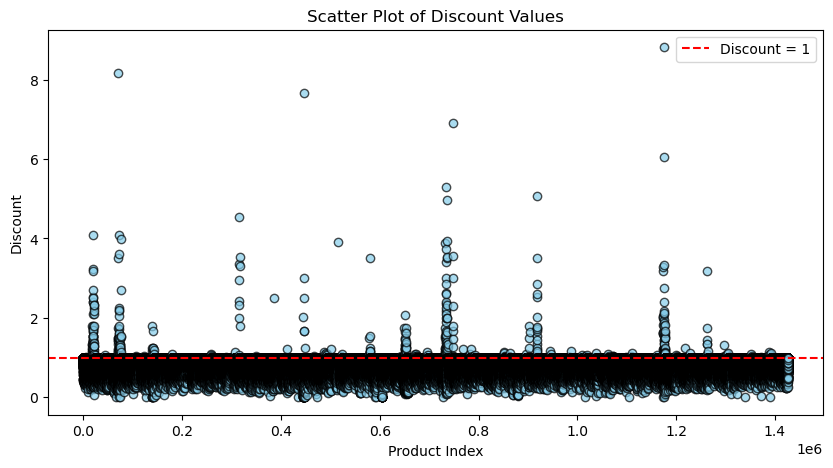

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(data.index, data['Discount'], color='skyblue', edgecolor='black', alpha=0.7)
plt.axhline(y=1, color='red', linestyle='--', label='Discount = 1')
plt.title('Scatter Plot of Discount Values')
plt.xlabel('Product Index')
plt.ylabel('Discount')
plt.legend()
plt.show()

In [7]:
# From the above scatter plot, we can see there're some products with discount > 1, which indicates 
# the price after discount is greater than the original price. 
num_rows_discount_gt_1 = data[data['Discount'] > 1].shape[0]
print(f"Number of rows with Discount > 1: {num_rows_discount_gt_1}")
num_rows_total = data.shape[0]
print(f"Number of rows in total: {num_rows_total}")
print(f"Proportion of data with wrong Discount: {num_rows_discount_gt_1/num_rows_total}")
# As there are only around 0.32% products with this kind of error, we decide to drop the data

Number of rows with Discount > 1: 451
Number of rows in total: 1426336
Proportion of data with wrong Discount: 0.00031619478159423866


In [8]:
# Drop rows where 'Discount' is greater than 1
data = data[data['Discount'] <= 1]

In [9]:
# Now we focus on the products with price = 0, as it's not logically make sense for a free product from amazon
num_rows_price_0 = data[data['price'] == 0].shape[0]
print(f"Number of rows with Price = 0: {num_rows_price_0}")
print(f"Proportion of data with wrong Price: {num_rows_price_0/num_rows_total}")

Number of rows with Price = 0: 49
Proportion of data with wrong Price: 3.435375675857582e-05


In [10]:
# As only 2.3% data has no price, we decide to drop all those rows
data = data[data['price'] > 0]

In [11]:
# Store the cleaned data in a new csv file
output_path = '../cleaned_data/amazon_product_cleaned.csv'
data.to_csv(output_path, index=False)